***Healthcare Engagement Experimentation Dashboard***

Author: Lulu Osofisan

Goal: Simulate an A/B test and model appointment adherence uplift

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, confusion_matrix, classification_report

np.random.seed(42)

# ---- Generate synthetic dataset ----
n = 10000
data = pd.DataFrame({
    "message_group": np.random.choice(["Control", "Optimized"], size=n, p=[0.5, 0.5]),
    "patient_age": np.random.randint(18, 80, n),
    "prior_no_show": np.random.poisson(1, n),
    "appointment_type": np.random.choice(["Consult", "Follow-up"], n)
})

# Underlying Probabilities
data["base_prob"] = 0.65 \
    + 0.1 * (data["message_group"] == "Optimized").astype(int) \
    - 0.02 * data["prior_no_show"] \
    + np.random.normal(0, 0.03, n)

# Convert to adherence outcome
data["adhered"] = (np.random.rand(n) < data["base_prob"]).astype(int)

# ----Analyze the A/B test ----
summary = data.groupby("message_group")["adhered"].mean().reset_index()
summary.columns = ["Group", "Adherence Rate"]
summary["Lift (%)"] = (summary["Adherence Rate"].pct_change().iloc[-1] * 100).round(2)
summary

,Group,Adherence Rate,Lift (%)
0,Control,0.627266,16.98
1,Optimized,0.733753,16.98


/tmp/ipython-input-3559393325.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=summary, x="Group", y="Adherence Rate", palette="coolwarm")


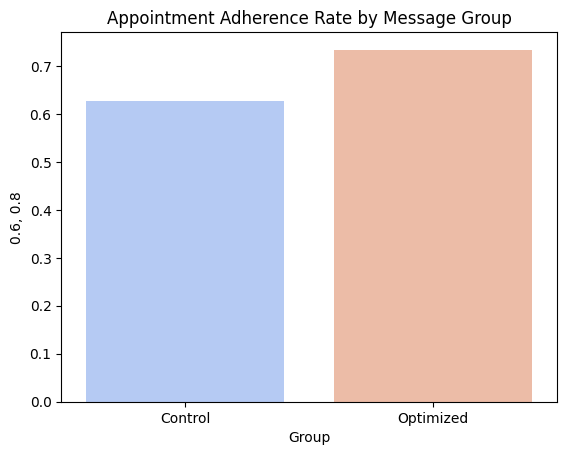

In [8]:
# Visualize results
sns.barplot(data=summary, x="Group", y="Adherence Rate", palette="coolwarm")
plt.title("Appointment Adherence Rate by Message Group")
plt.ylabel("0.6, 0.8")
plt.show()

In [9]:
# Logistic regression model to predict adherence
X = pd.get_dummies(data[["message_group", "patient_age", "prior_no_show", "appointment_type"]], drop_first=True)
y = data["adhered"]

model = LogisticRegression()
model.fit(X, y)

preds = model.predict_proba(X)[:, 1]
auc = roc_auc_score(y, preds)
print(f"ROC-AUC: {auc:.3f}")

# Show feature impact
coeff_df = pd.DataFrame({"Feature": X.columns, "Coefficient": model.coef_[0]})
coeff_df.sort_values("Coefficient", ascending=False)

ROC-AUC: 0.573


,Feature,Coefficient
2,message_group_Optimized,0.492968
0,patient_age,-0.001627
3,appointment_type_Follow-up,-0.019191
1,prior_no_show,-0.089308


from matplotlib import pyplot as plt
_df_0['Coefficient'].plot(kind='hist', bins=20, title='Coefficient')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_1.groupby('Feature').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['Coefficient'].plot(kind='line', figsize=(8, 4), title='Coefficient')
plt.gca().spines[['top', 'right']].set_visible(False)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_3['Feature'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_3, x='Coefficient', y='Feature', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

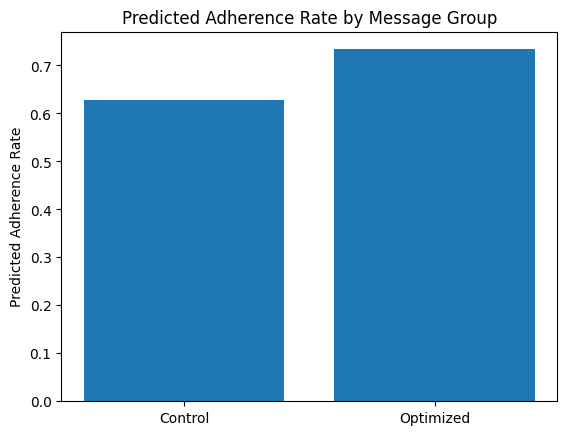

In [10]:
# Plot predicted uplift
data["pred_prob"] = preds
avg_pred = data.groupby("message_group")["pred_prob"].mean().reset_index()

plt.bar(avg_pred["message_group"], avg_pred["pred_prob"])
plt.title("Predicted Adherence Rate by Message Group")
plt.ylabel("Predicted Adherence Rate")
plt.show()

In [12]:
# Summary insight
lift = summary["Lift (%)"].iloc[-1]
print(f"The Optimized group increased adherence by approximately {lift:.2f}% compared to the Control group.")

The Optimized group increased adherence by approximately 16.98% compared to the Control group.


## Load the data

### Subtask:
Load the necessary data into a pandas DataFrame.


**Reasoning**:
Import pandas and load the data from the specified CSV file into a DataFrame, then display the head and info to inspect the data.

